In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Make dataset

In [17]:
from mvae.utils.toy_dataset_maker import ToyDatasetMaker

In [44]:
maker = ToyDatasetMaker(20, 20, 3.2, 0.1, 0.6, 100)

(0, 20)

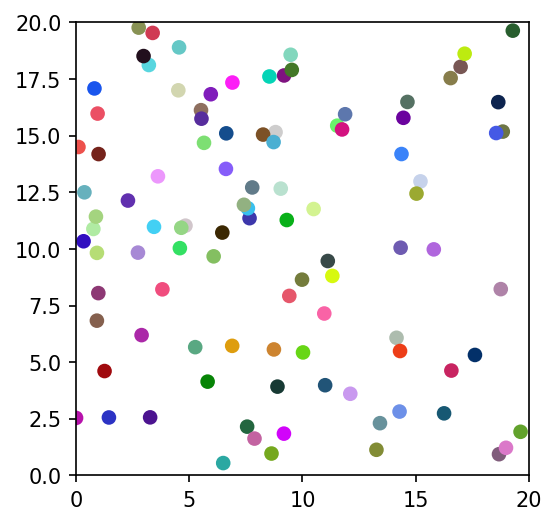

In [45]:
plt.figure(dpi=150)
points = maker._centers
colors = maker._colors
plt.scatter(points[:, 0], points[:, 1], c=colors / 255)
plt.gca().set_aspect("equal")
plt.xlim(0, 20)
plt.ylim(0, 20)

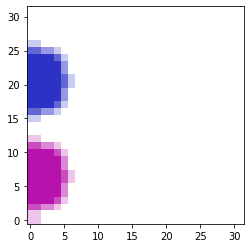

In [46]:
image = maker.get_image(np.array([1, 1, -np.pi / 2]))
plt.imshow(image, origin="low")

In [30]:
trajectory = maker.make_random_trajectory(1024)

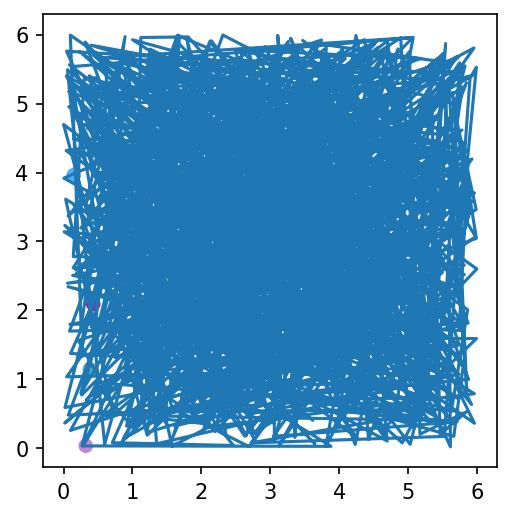

In [31]:
plt.figure(dpi=150)
points = maker._centers
colors = maker._colors
plt.scatter(points[:, 0], points[:, 1], c=colors / 255)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.gca().set_aspect("equal")

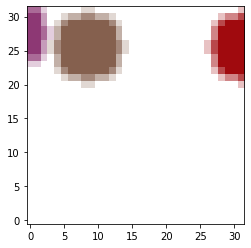

In [47]:
image = maker.get_image(trajectory[4])
plt.imshow(image, origin="low")

# Rotate angle

In [10]:
def rotate_data_point(image, angle):
    angle_delta = np.random.random() * 2 * np.pi
    angle = angle + angle_delta
    angle_delta = angle_delta / np.pi * 180
    matrix = cv2.getRotationMatrix2D((image.shape[1] / 2 - 0.5, image.shape[0] / 2 - 0.5), angle_delta, 1)
    image = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]), cv2.INTER_NEAREST, borderValue=(255, 255, 255))
    return image, angle

In [11]:
np.random.seed(4)
position = trajectory[30]
image = maker.get_image(position)
image1, angle = rotate_data_point(image, position[2])
image2 = maker.get_image(np.array([position[0], position[1],  angle]))

(14, 27)

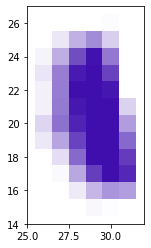

In [25]:
plt.imshow(image1, origin="low")
plt.xlim(25, 32)
plt.ylim(14, 27)

(14, 27)

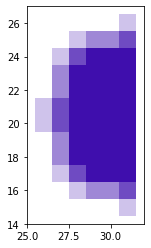

In [24]:
plt.imshow(image2, origin="low")
plt.xlim(25, 32)
plt.ylim(14, 27)

# Save dataset

In [48]:
maker.save_dataset("100_point_dataset.npz", 0.05, 8192, "random")